In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [2]:
transform = transforms.Compose([
    transforms.Resize((400,300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAffine(10, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(r'output\train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = datasets.ImageFolder(r'output\val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8)

test_dataset = datasets.ImageFolder(r'output\test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=8)

In [3]:
device = torch.device('cuda:0') if torch.cuda.is_available() else "cpu"

In [4]:
device

device(type='cuda', index=0)

In [5]:
model = models.densenet201(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 4)  
)
model.to(device)

c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

100%|██████████| 302/302 [02:11<00:00,  2.29it/s]


Epoch 1/50, Loss: 0.48546153163870437
Validation Accuracy: 68.89632107023411%


100%|██████████| 302/302 [01:59<00:00,  2.52it/s]


Epoch 2/50, Loss: 0.4766847107633455
Validation Accuracy: 26.755852842809364%


100%|██████████| 302/302 [01:57<00:00,  2.57it/s]


Epoch 3/50, Loss: 0.47864271535087893
Validation Accuracy: 77.25752508361204%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 4/50, Loss: 0.4813481724962888
Validation Accuracy: 58.19397993311036%


100%|██████████| 302/302 [01:59<00:00,  2.54it/s]


Epoch 5/50, Loss: 0.48042995961296636
Validation Accuracy: 81.60535117056857%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 6/50, Loss: 0.482189271278334
Validation Accuracy: 79.26421404682274%


100%|██████████| 302/302 [01:57<00:00,  2.57it/s]


Epoch 7/50, Loss: 0.4454326014595711
Validation Accuracy: 83.94648829431438%


100%|██████████| 302/302 [01:59<00:00,  2.52it/s]


Epoch 8/50, Loss: 0.4501778130845124
Validation Accuracy: 82.6086956521739%


100%|██████████| 302/302 [01:59<00:00,  2.53it/s]


Epoch 9/50, Loss: 0.4693726078786005
Validation Accuracy: 61.20401337792642%


100%|██████████| 302/302 [01:59<00:00,  2.52it/s]


Epoch 10/50, Loss: 0.456028299874916
Validation Accuracy: 81.60535117056857%


100%|██████████| 302/302 [01:59<00:00,  2.53it/s]


Epoch 11/50, Loss: 0.44204372971855255
Validation Accuracy: 78.59531772575251%


100%|██████████| 302/302 [01:58<00:00,  2.56it/s]


Epoch 12/50, Loss: 0.4536942903273153
Validation Accuracy: 63.87959866220736%


100%|██████████| 302/302 [01:57<00:00,  2.57it/s]


Epoch 13/50, Loss: 0.45128791882897057
Validation Accuracy: 48.82943143812709%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 14/50, Loss: 0.4628115032262952
Validation Accuracy: 61.53846153846154%


100%|██████████| 302/302 [01:58<00:00,  2.54it/s]


Epoch 15/50, Loss: 0.45829334682384076
Validation Accuracy: 80.93645484949833%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 16/50, Loss: 0.43593656523338215
Validation Accuracy: 66.22073578595318%


100%|██████████| 302/302 [01:59<00:00,  2.53it/s]


Epoch 17/50, Loss: 0.45371600656788674
Validation Accuracy: 81.60535117056857%


100%|██████████| 302/302 [01:58<00:00,  2.54it/s]


Epoch 18/50, Loss: 0.44303257235430726
Validation Accuracy: 76.92307692307693%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 19/50, Loss: 0.4193136904925256
Validation Accuracy: 59.86622073578596%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 20/50, Loss: 0.4366775288289746
Validation Accuracy: 64.54849498327759%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 21/50, Loss: 0.44557339503176957
Validation Accuracy: 67.55852842809364%


100%|██████████| 302/302 [01:58<00:00,  2.56it/s]


Epoch 22/50, Loss: 0.4280386280934542
Validation Accuracy: 25.75250836120401%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 23/50, Loss: 0.42717816998923064
Validation Accuracy: 78.92976588628763%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 24/50, Loss: 0.4331662080047146
Validation Accuracy: 82.2742474916388%


100%|██████████| 302/302 [01:57<00:00,  2.57it/s]


Epoch 25/50, Loss: 0.42028204813007486
Validation Accuracy: 70.90301003344482%


100%|██████████| 302/302 [01:58<00:00,  2.55it/s]


Epoch 26/50, Loss: 0.4259752952401212
Validation Accuracy: 48.49498327759198%


100%|██████████| 302/302 [01:44<00:00,  2.88it/s]


Epoch 27/50, Loss: 0.43406559541722795
Validation Accuracy: 80.2675585284281%


100%|██████████| 302/302 [01:24<00:00,  3.56it/s]


Epoch 28/50, Loss: 0.4348299307933706
Validation Accuracy: 56.85618729096989%


100%|██████████| 302/302 [01:24<00:00,  3.56it/s]


Epoch 29/50, Loss: 0.4407965091137302
Validation Accuracy: 60.200668896321076%


100%|██████████| 302/302 [01:26<00:00,  3.50it/s]


Epoch 30/50, Loss: 0.4314541430860166
Validation Accuracy: 83.27759197324414%


100%|██████████| 302/302 [01:27<00:00,  3.47it/s]


Epoch 31/50, Loss: 0.4089412892002933
Validation Accuracy: 80.2675585284281%


100%|██████████| 302/302 [01:27<00:00,  3.47it/s]


Epoch 32/50, Loss: 0.4279175278613504
Validation Accuracy: 77.92642140468227%


100%|██████████| 302/302 [01:26<00:00,  3.48it/s]


Epoch 33/50, Loss: 0.4208560376890645
Validation Accuracy: 81.60535117056857%


100%|██████████| 302/302 [01:26<00:00,  3.50it/s]


Epoch 34/50, Loss: 0.40188081632830847
Validation Accuracy: 72.90969899665552%


100%|██████████| 302/302 [01:26<00:00,  3.49it/s]


Epoch 35/50, Loss: 0.4255028059027645
Validation Accuracy: 31.77257525083612%


100%|██████████| 302/302 [01:26<00:00,  3.49it/s]


Epoch 36/50, Loss: 0.41445871884163643
Validation Accuracy: 73.57859531772574%


100%|██████████| 302/302 [01:26<00:00,  3.49it/s]


Epoch 37/50, Loss: 0.42033242244298097
Validation Accuracy: 77.25752508361204%


100%|██████████| 302/302 [01:26<00:00,  3.48it/s]


Epoch 38/50, Loss: 0.43132327252764574
Validation Accuracy: 75.91973244147158%


100%|██████████| 302/302 [01:30<00:00,  3.33it/s]


Epoch 39/50, Loss: 0.4110908883790307
Validation Accuracy: 79.93311036789298%


100%|██████████| 302/302 [01:35<00:00,  3.16it/s]


Epoch 40/50, Loss: 0.42880410762713445
Validation Accuracy: 74.5819397993311%


100%|██████████| 302/302 [01:26<00:00,  3.50it/s]


Epoch 41/50, Loss: 0.394334363103505
Validation Accuracy: 75.25083612040135%


100%|██████████| 302/302 [01:27<00:00,  3.47it/s]


Epoch 42/50, Loss: 0.41433952505768135
Validation Accuracy: 68.22742474916387%


100%|██████████| 302/302 [01:26<00:00,  3.48it/s]


Epoch 43/50, Loss: 0.38593823297430346
Validation Accuracy: 81.27090301003345%


100%|██████████| 302/302 [01:27<00:00,  3.46it/s]


Epoch 44/50, Loss: 0.38581739132915505
Validation Accuracy: 78.59531772575251%


100%|██████████| 302/302 [01:26<00:00,  3.47it/s]


Epoch 45/50, Loss: 0.40213232523212766
Validation Accuracy: 82.2742474916388%


100%|██████████| 302/302 [01:26<00:00,  3.49it/s]


Epoch 46/50, Loss: 0.3981731991400782
Validation Accuracy: 72.24080267558529%


100%|██████████| 302/302 [01:27<00:00,  3.46it/s]


Epoch 47/50, Loss: 0.3975597420176923
Validation Accuracy: 79.59866220735786%


100%|██████████| 302/302 [01:26<00:00,  3.48it/s]


Epoch 48/50, Loss: 0.3971695024520159
Validation Accuracy: 68.22742474916387%


100%|██████████| 302/302 [01:26<00:00,  3.48it/s]


Epoch 49/50, Loss: 0.42011619524549176
Validation Accuracy: 74.91638795986621%


100%|██████████| 302/302 [01:26<00:00,  3.50it/s]


Epoch 50/50, Loss: 0.40494740707491406
Validation Accuracy: 79.93311036789298%
Training finished.


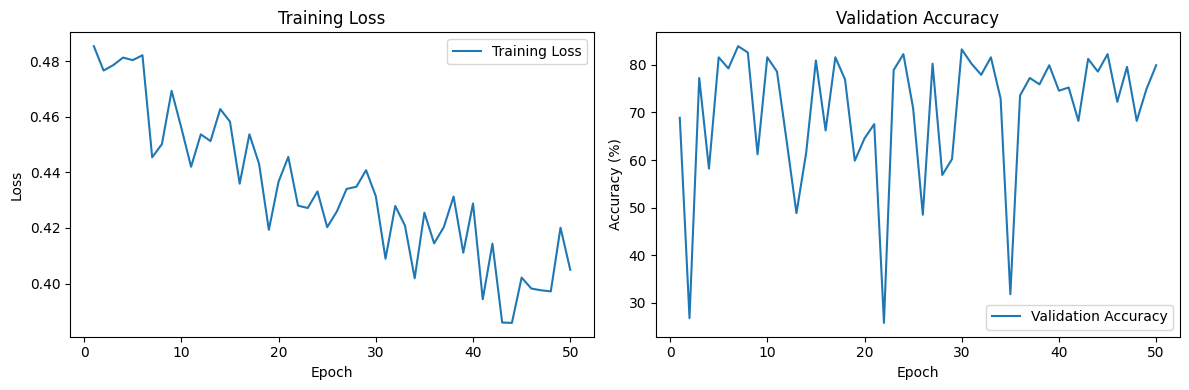

In [11]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

# Define your model, train_loader, val_loader, optimizer, and criterion

num_epochs = 50
train_losses = []  # To store training losses
val_accuracies = []  # To store validation accuracies

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    val_accuracy = correct / total * 100
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss}')
    print(f'Validation Accuracy: {val_accuracy}%')

print('Training finished.')

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.show()


In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
        # print(labels,predicted)

    print(f'Test Accuracy: {correct / total * 100}%')

100%|██████████| 38/38 [00:07<00:00,  5.09it/s]

Test Accuracy: 80.13245033112582%


In [13]:
correct,total

(242, 302)

In [14]:
torch.save(model,'CovidPneumonia2densenet201.pt')